In [1]:
# cargar librerías
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gurobipy import *
import scipy.stats as st
from numpy.polynomial import Polynomial as P
import geopandas as gpd
import matplotlib.ticker as ticker

In [2]:
from shapely.geometry import Polygon
from shapely.geometry import Point
from geopy import distance

In [3]:
PathCoquimbo = 'C:/Users/Csotelo/Documents/MCII/LOGISTICA HUMANITARIA/CITSU_Coquimbo_La_Serena_2da_Ed._2015-polygon.shp'
RiesgoTsunami = gpd.read_file(PathCoquimbo)
def profundidadEstimada(x):
    profundidad = 0
    if x == 'Profundidad de la inundación: 0 a 1 m':
        profundidad = 1
    elif x == 'Profundidad de la inundación: 1 a 2 m':
        profundidad = 2
    elif x == 'Profundidad de la inundación: 2 a 4 m':
        profundidad = 4
    elif x == 'Profundidad de la inundación: 4 a 6 m':
        profundidad = 6
    elif x == 'Profundidad de la inundación: 6 y más':
        profundidad = 8
    else:
        profundidad = None
    return profundidad
RiesgoTsunami['profundidad'] = RiesgoTsunami['Name'].apply(profundidadEstimada)
RiesgoTsunami

,Name,descriptio,geometry,profundidad
0,Profundidad de la inundación: 0 a 1 m,"""2da Edición Mayo 2015""<br><br>Las característ...","MULTIPOLYGON (((-71.35609 -29.98663, -71.35618...",1
1,Profundidad de la inundación: 1 a 2 m,"""2da Edición Mayo 2015""<br><br>Las característ...","MULTIPOLYGON (((-71.35612 -29.98592, -71.35616...",2
2,Profundidad de la inundación: 2 a 4 m,"""2da Edición Mayo 2015""<br><br>Las característ...","MULTIPOLYGON (((-71.35608 -29.98483, -71.35618...",4
3,Profundidad de la inundación: 4 a 6 m,"""2da Edición Mayo 2015""<br><br>Las característ...","MULTIPOLYGON (((-71.35152 -29.96561, -71.35138...",6
4,Profundidad de la inundación: 6 y más,"""2da Edición Mayo 2015""<br><br>Las característ...","MULTIPOLYGON (((-71.36014 -29.98299, -71.36015...",8


In [4]:
PathCoquimbo = 'C:/Users/Csotelo/Documents/MCII/LOGISTICA HUMANITARIA/R04/MANZANA_IND_C17.shp'
Manzent = gpd.read_file(PathCoquimbo)
#Manzent = Manzent[(Manzent['URBANO']=='LA SERENA')|(Manzent['URBANO']=='COQUIMBO')]
Manzent = Manzent[(Manzent['NOM_COMUNA']=='LA SERENA')|(Manzent['NOM_COMUNA']=='COQUIMBO')]
Manzent = Manzent[(Manzent['CATEGORIA']==1)]
Lregion = []
Lnom_region = []
Lprovincia = []
Lnom_provincia = []
Lcomuna = []
Lnom_comuna = []
Ldistrito = []
Lloc_zon = []
Lent_man = []
Lcategoria = []
Lnom_catego = []
Lmanzent_i = []
Ltotal_pers = []
Ltotal_vivi = []
Lshape_leng = []
Lshape_area = []
Lgeometry = []
LrepresentativePoint = []
for k in range(len(Manzent)):
    region = Manzent['REGION'].iloc[k]
    nom_region = Manzent['NOM_REGION'].iloc[k]
    provincia = Manzent['PROVINCIA'].iloc[k]
    nom_provincia = Manzent['NOM_PROVIN'].iloc[k]
    comuna = Manzent['COMUNA'].iloc[k]
    nom_comuna = Manzent['NOM_COMUNA'].iloc[k]
    distrito = Manzent['DISTRITO'].iloc[k]
    loc_zon = Manzent['LOC_ZON'].iloc[k]
    ent_man = Manzent['ENT_MAN'].iloc[k]
    categoria = Manzent['CATEGORIA'].iloc[k]
    nom_catego = Manzent['NOM_CATEGO'].iloc[k]
    manzent_i = Manzent['MANZENT_I'].iloc[k]
    total_pers = Manzent['TOTAL_PERS'].iloc[k]
    total_vivi = Manzent['TOTAL_VIVI'].iloc[k]
    shape_leng = Manzent['SHAPE_Leng'].iloc[k]
    shape_area = Manzent['SHAPE_Area'].iloc[k]
    geometry = Manzent['geometry'].iloc[k]
    representativePoint = geometry.representative_point()
    vertices = list(representativePoint.coords)
    if -vertices[0][0]<=71.45:
        Lregion.append(region)
        Lnom_region.append(nom_region)
        Lprovincia.append(provincia)
        Lnom_provincia.append(nom_provincia)
        Lcomuna.append(comuna)
        Lnom_comuna.append(nom_comuna)
        Ldistrito.append(distrito)
        Lloc_zon.append(loc_zon)
        Lent_man.append(ent_man)
        Lcategoria.append(categoria)
        Lnom_catego.append(nom_catego)
        Lmanzent_i.append(manzent_i)
        Ltotal_pers.append(total_pers)
        Ltotal_vivi.append(total_vivi)
        Lshape_leng.append(shape_leng)
        Lshape_area.append(shape_area)
        Lgeometry.append(geometry)
        LrepresentativePoint.append(representativePoint)

In [5]:
#Lgeometry
Manzent = {'REGION':Lregion, 'NOM_REGION':Lnom_region, 'PROVINCIA':Lprovincia, 'NOM_PROVINCIA':Lnom_provincia, 'COMUNA':Lcomuna,
           'NOM_COMUNA':Lnom_comuna, 'DISTRITO':Ldistrito, 'LOC_ZON':Lloc_zon, 'ENT_MAN':Lent_man, 'CATEGORIA':Lcategoria, 
           'NOM_CATEGO':Lnom_catego, 'MANZENT_I':Lmanzent_i, 'TOTAL_PERS':Ltotal_pers, 'TOTAL_VIVI':Ltotal_vivi, 
           'SHAPE_LENG':Lshape_leng, 'SHAPE_AREA':Lshape_area}
Manzent = pd.DataFrame(Manzent)
Manzent = gpd.geopandas.GeoDataFrame(Manzent,crs=RiesgoTsunami.crs, geometry=Lgeometry)
len(Manzent)

4896

In [6]:
#LrepresentativePoint
manzentPointsDF = {'MANZENT_I':Lmanzent_i}
manzentPointsDF = pd.DataFrame(manzentPointsDF)
manzentPointsDF = gpd.geopandas.GeoDataFrame(manzentPointsDF, crs= RiesgoTsunami.crs ,geometry=LrepresentativePoint)

In [7]:
# ruta al geojson del pais
PathRutas = 'C:/Users/Csotelo/Documents/MCII/LOGISTICA HUMANITARIA/R04/CALLES_PAIS_C17.shp'
rutasCoquimbo = gpd.read_file(PathRutas)
rutasCoquimbo = rutasCoquimbo[(rutasCoquimbo['NOM_COMUNA']=='LA SERENA')|(rutasCoquimbo['NOM_COMUNA']=='COQUIMBO')]

Lregion = []
Lcomuna = []
Lnom_comuna = []
Lnombre_via = []
Lclase_comu = []
Lclase_urba = []
Lshape_leng = []
Lgeometry = []
Lcoordenadas = []
for k in range(len(rutasCoquimbo)):
    region = rutasCoquimbo['REGION'].iloc[k]
    comuna = rutasCoquimbo['COMUNA'].iloc[k]
    nom_comuna = rutasCoquimbo['NOM_COMUNA'].iloc[k]
    nombre_via = rutasCoquimbo['NOMBRE_VIA'].iloc[k]
    clase_comu = rutasCoquimbo['CLASE_COMU'].iloc[k]
    clase_urba = rutasCoquimbo['CLASE_URBA'].iloc[k]
    shape_leng = rutasCoquimbo['Shape_Leng'].iloc[k]
    geometry = rutasCoquimbo['geometry'].iloc[k]
    representativePoint = list(geometry.representative_point().coords)
    if ((-representativePoint[0][0]<=71.40) and (-representativePoint[0][0]>=71.17))and(-representativePoint[0][1]<=30.05) and (-representativePoint[0][1]>=29.85):
        Lregion.append(region)
        Lcomuna.append(comuna)
        Lnom_comuna.append(nom_comuna)
        Lnombre_via.append(nombre_via)
        Lclase_comu.append(clase_comu)
        Lclase_urba.append(clase_urba)
        Lshape_leng.append(shape_leng)
        Lgeometry.append(geometry)
        Lcoordenadas.append(representativePoint)

rutasCoquimbo = {'REGION':Lregion, 'COMUNA':Lcomuna, 'NOM_COMUNA':Lnom_comuna, 'NOMBRE_VIA':Lnombre_via, 
                 'CLASE_COMU':Lclase_comu, 'CLASE_URBA':Lclase_urba, 'Shape_Leng':Lshape_leng}
rutasCoquimbo = pd.DataFrame(rutasCoquimbo)
rutasCoquimbo = gpd.geopandas.GeoDataFrame(rutasCoquimbo,crs=RiesgoTsunami.crs, geometry=Lgeometry)
len(rutasCoquimbo)

24003

In [8]:
rutasCoquimbo.drop_duplicates(subset=['geometry'], keep = 'first', inplace=True)
Lregion = []
Lcomuna = []
Lnom_comuna = []
Lnombre_via = []
Lclase_comu = []
Lclase_urba = []
Lshape_leng = []
Lgeometry = []
id_rutas = []
for p in range(len(rutasCoquimbo)):
    id_rutas.append(p)
    region = rutasCoquimbo['REGION'].iloc[p]
    comuna = rutasCoquimbo['COMUNA'].iloc[p]
    nom_comuna = rutasCoquimbo['NOM_COMUNA'].iloc[p]
    nombre_via = rutasCoquimbo['NOMBRE_VIA'].iloc[p]
    clase_comu = rutasCoquimbo['CLASE_COMU'].iloc[p]
    clase_urba = rutasCoquimbo['CLASE_URBA'].iloc[p]
    shape_leng = rutasCoquimbo['Shape_Leng'].iloc[p]
    geometry = rutasCoquimbo['geometry'].iloc[p]
    Lregion.append(region)
    Lcomuna.append(comuna)
    Lnom_comuna.append(nom_comuna)
    Lnombre_via.append(nombre_via)
    Lclase_comu.append(clase_comu)
    Lclase_urba.append(clase_urba)
    Lshape_leng.append(shape_leng)
    Lgeometry.append(geometry)    
    
rutasCoquimbo = {'id_ruta':id_rutas,'REGION':Lregion, 'COMUNA':Lcomuna, 'NOM_COMUNA':Lnom_comuna, 'NOMBRE_VIA':Lnombre_via, 
                 'CLASE_COMU':Lclase_comu, 'CLASE_URBA':Lclase_urba, 'Shape_Leng':Lshape_leng}
rutasCoquimbo = pd.DataFrame(rutasCoquimbo)
rutasCoquimbo = gpd.GeoDataFrame(rutasCoquimbo, crs = RiesgoTsunami.crs, geometry=Lgeometry)
rutasCoquimbo

,id_ruta,REGION,COMUNA,NOM_COMUNA,NOMBRE_VIA,CLASE_COMU,CLASE_URBA,Shape_Leng,geometry
0,0,4,COQUIMBO,COQUIMBO,RUBEN JIMENEZ,N/A,AVENIDA,1.140408e-04,"LINESTRING (-71.32993 -29.97007, -71.32987 -29..."
1,1,4,COQUIMBO,COQUIMBO,PRESIDENTE JOSE MANUEL BALMACEDA,N/A,AVENIDA,2.607972e-03,"LINESTRING (-71.26831 -29.95225, -71.26831 -29..."
2,2,4,COQUIMBO,COQUIMBO,ESPAÑA,N/A,CALLE,3.997631e-04,"LINESTRING (-71.34204 -29.96681, -71.34175 -29..."
3,3,4,COQUIMBO,COQUIMBO,CIRCUNVALACION PRESIDENTE SALVADOR ALLENDE,N/A,AVENIDA,3.247786e-04,"LINESTRING (-71.33849 -29.97929, -71.33858 -29..."
4,4,4,COQUIMBO,COQUIMBO,LAS FLORES,N/A,AVENIDA,1.245935e-03,"LINESTRING (-71.35110 -29.98871, -71.35113 -29..."
...,...,...,...,...,...,...,...,...,...
23970,23970,4,LA SERENA,LA SERENA,LOS CEIBOS,N/A,PASAJE,3.793700e-04,"LINESTRING (-71.26827 -29.94499, -71.26805 -29..."
23971,23971,4,LA SERENA,LA SERENA,LOS JUNCOS,N/A,CALLE,4.764218e-07,"LINESTRING (-71.26805 -29.94468, -71.26805 -29..."
23972,23972,4,LA SERENA,LA SERENA,LOS CEIBOS,N/A,PASAJE,1.052822e-07,"LINESTRING (-71.26805 -29.94468, -71.26805 -29..."
23973,23973,4,LA SERENA,LA SERENA,LOS JUNCOS,N/A,CALLE,4.238720e-04,"LINESTRING (-71.26842 -29.94447, -71.26805 -29..."


In [9]:
def distances(x):
    ruta = []
    for i in list(x.coords):
        lng = i[0]
        lat = i[1]
        ruta.append((lat,lng))
    distancia=0
    for k in range(len(ruta)-1):
        distancia += round(distance.distance(ruta[k], ruta[k+1]).m,2)
    return distancia
rutasCoquimbo['METROS'] = rutasCoquimbo['geometry'].apply(distances)

<AxesSubplot:>

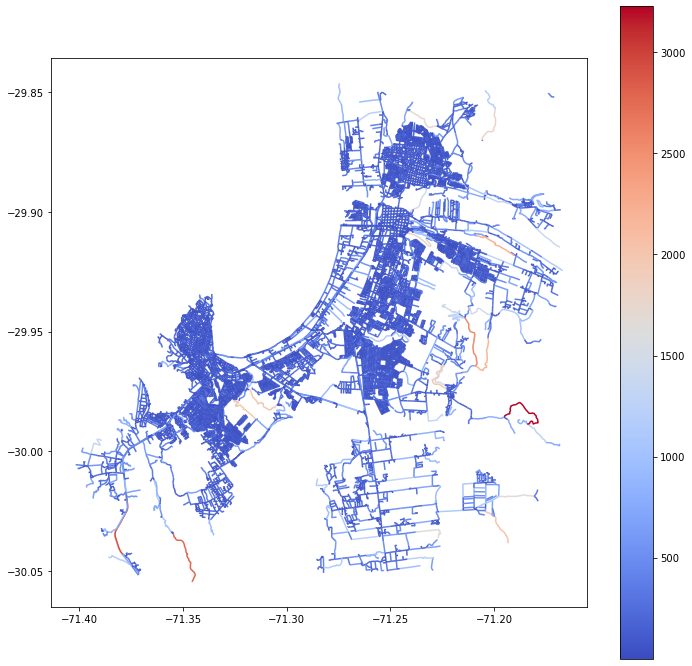

In [10]:
rutasCoquimbo.plot(column='METROS', cmap='coolwarm', legend=True, figsize=(12,12))

In [11]:
pd.unique(rutasCoquimbo['CLASE_URBA'])

array(['AVENIDA', 'CALLE', 'PASAJE', 'N/A', 'CARRETERA', 'HUELLA',
       'SOBRENIVEL', 'PEATONAL', 'PRIVADO', 'ESCALA', 'BAJONIVEL',
       'SENDERO', 'PUENTE'], dtype=object)

In [12]:
nodos = []
for p in range(len(rutasCoquimbo)):
    r = list(rutasCoquimbo['geometry'].iloc[p].coords)
    inicio = r[0]
    fin = r[-1]
    if not inicio in nodos:
        nodos.append(inicio)
    if not fin in nodos:
        nodos.append(fin)
        
V = {nodos[p]:p for p in range(len(nodos))}
nodos = {p:nodos[p] for p in range(len(nodos))}

In [13]:
arcs = []
contador = []
P = {p:rutasCoquimbo['geometry'].iloc[p] for p in range(len(rutasCoquimbo))}
for p in range(len(rutasCoquimbo)):
    r = rutasCoquimbo['geometry'].iloc[p]
    g = V[list(r.coords)[0]]
    h = V[list(r.coords)[-1]]
    if not (p,g,h) in arcs:
        arcs.append((p,g,h))
        contador.append(1)
    else:
        pos = arcs.index((p,g,h))
        contador[pos]+=1

In [14]:
paths = []
inicios = []
finales = []

for p,g,h in arcs:
    paths.append(p)
    inicios.append(g)
    finales.append(h)

df = {'paths':paths, 'inicio':inicios, 'fin':finales}
df = pd.DataFrame(df)
df.groupby(by=['inicio'], axis=0, as_index=False).count().sort_values(by='paths', ascending=False).head()

,inicio,paths,fin
2019,2116,5,5
11864,13292,4,4
3591,3780,4,4
2798,2935,4,4
9355,10571,4,4


In [15]:
arcos = arcs.copy()
for arc in arcos:
    if not (arc[0], arc[2], arc[1]) in arcos:
        arcos.append((arc[0], arc[2], arc[1]))
paths = []
inicios = []
finales = []

for p,g,h in arcos:
    paths.append(p)
    inicios.append(g)
    finales.append(h)
    
df = {'path':paths, 'inicio':inicios, 'fin':finales}
df = pd.DataFrame(df)
df[(df['inicio']==0)|(df['fin']==0)]

,path,inicio,fin
0,0,0,1
3761,3761,0,5377
10210,10210,8353,0
23975,0,1,0
27730,3761,5377,0
34164,10210,0,8353


In [16]:
F = {p:rutasCoquimbo[rutasCoquimbo['id_ruta']==p]['METROS'].iloc[0] for p in range(len(rutasCoquimbo))}

In [17]:
manzentPointsDF

,MANZENT_I,geometry
0,4101171001001,POINT (-71.24008 -29.87931)
1,4101171001002,POINT (-71.23955 -29.87927)
2,4101171001003,POINT (-71.23909 -29.87965)
3,4101171001004,POINT (-71.23856 -29.87983)
4,4101171001005,POINT (-71.23767 -29.87993)
...,...,...
4891,4102181005901,POINT (-71.33324 -30.00680)
4892,4102181006901,POINT (-71.33053 -29.99320)
4893,4102181007901,POINT (-71.32929 -29.99776)
4894,4102181008901,POINT (-71.34728 -29.97941)


In [18]:
list(manzentPointsDF['geometry'].iloc[0].coords)[0]

(-71.24008387430834, -29.87930911449996)

In [19]:
nodos[0]

(-71.32992510695806, -29.970067903211145)

In [20]:
lat = list(manzentPointsDF['geometry'].iloc[0].coords)[0][1]
lng = list(manzentPointsDF['geometry'].iloc[0].coords)[0][0]
manzentPoint = (lat, lng)
distance.distance(manzentPoint, (nodos[0][1], nodos[0][0])).m

13284.327906920587

In [21]:
manzentPoint

(-29.87930911449996, -71.24008387430834)

In [22]:
(nodos[0][1], nodos[0][0])

(-29.970067903211145, -71.32992510695806)

In [23]:
def inversionCord(x):
    lat = list(x.coords)[0][1]
    lng = list(x.coords)[0][0]
    return (lat,lng)
#distancias = {(d,g):distance.distance(inversionCord(manzentPointsDF['geometry'].iloc[d]), (nodos[g][1], nodos[g][0])).m
#             for d in range(len(manzentPointsDF)) for g in list(nodos.keys())}

# Obtención de conexión entre rutas por coordenadas georefenciadas

In [24]:
#modelo = Model('LH')

# Variables de decisión

$w_{gh}^p \in \{0,1\}$ = si voy por el camino $p \in P$ desde el nodo $g \in V$ hacia $h \in V$

In [25]:
#w = modelo.addVars(arcos, lb=0, ub=1, vtype=GRB.BINARY)
#f = {(p,g,h):rutasCoquimbo['METROS'].iloc[p] for p,g,h in arcos}

In [26]:
#obj = quicksum(w[(p,g,h)]*f[(p,g,h)] for p,g,h in arcos)
#modelo.setObjective(expr=obj, sense=GRB.MINIMIZE)

In [27]:
len(pd.unique(df[(df['inicio']==0)|(df['fin']==0)]['path']))

3

In [28]:
contador = []
for v in list(V.values()):
    contador.append(len(pd.unique(df[(df['inicio']==v)|(df['fin']==v)]['path'])))
len(contador)

17933

In [29]:
rutasgpd = {'contador':contador}
rutasgpd = pd.DataFrame(rutasgpd)
rutas = []
for v in list(nodos.keys()):
    rutas.append(Point(nodos[v]))
rutasgpd = gpd.geopandas.GeoDataFrame(rutasgpd, crs=RiesgoTsunami.crs, geometry=rutas)

In [30]:
# Obtenemos el CRS de la capa base
gridCRS = RiesgoTsunami.crs
# Reprojectamos las geometrias de los centros poblados
rutasgpd['geometry'] = rutasgpd['geometry'].to_crs(crs=gridCRS)

# tamaño de la figura:
figsize = (18, 18)

In [31]:
def fmt(x, pos):
    a= '{:1,.0f}'.format(x)
    return r'${}$'.format(a)

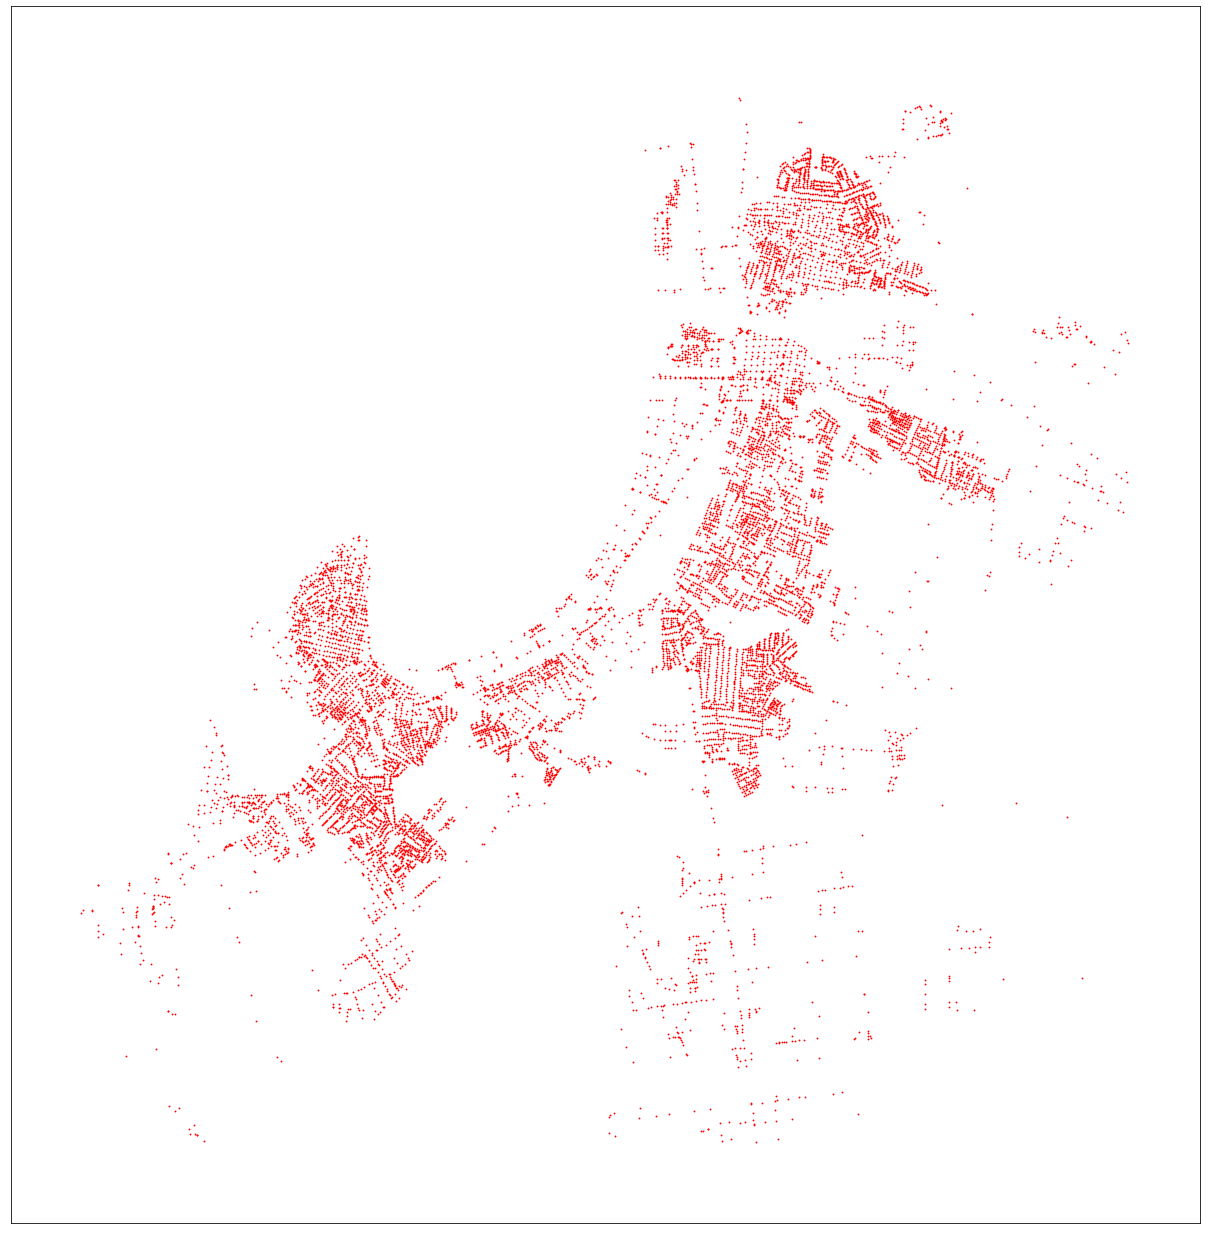

In [64]:
fig, ax = plt.subplots(figsize = figsize)
plt.rcParams['font.size'] = 35
plt.rcParams['font.family'] = 'serif'
cmap = 'Greys'

mapa = rutasCoquimbo.plot(ax=ax, linewidth=0.000001, alpha=1, legend=False, color='#132795')
rutasgpd[rutasgpd['contador']>2].plot(ax=mapa, color='red', markersize=0.7, legend = False)




plt.xticks([], [])
plt.yticks([], [])
plt.tight_layout()
plt.savefig('tesis images/full_network_(a).eps', format='eps')
plt.show()

In [60]:
rutasgpd.to_crs(crs=RiesgoTsunami.crs)
rutasCoquimbo.to_crs(crs=RiesgoTsunami.crs)
rutasgpdTsunami = gpd.sjoin_nearest(left_df=rutasgpd, right_df=RiesgoTsunami,max_distance=0.01, how='inner')
rutasTsunami = gpd.sjoin_nearest(left_df=rutasCoquimbo, right_df=RiesgoTsunami, max_distance=0.01, how='inner')

C:\Users\Csotelo\Anaconda3\envs\geo_env\lib\site-packages\geopandas\array.py:341: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(
C:\Users\Csotelo\Anaconda3\envs\geo_env\lib\site-packages\geopandas\array.py:341: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


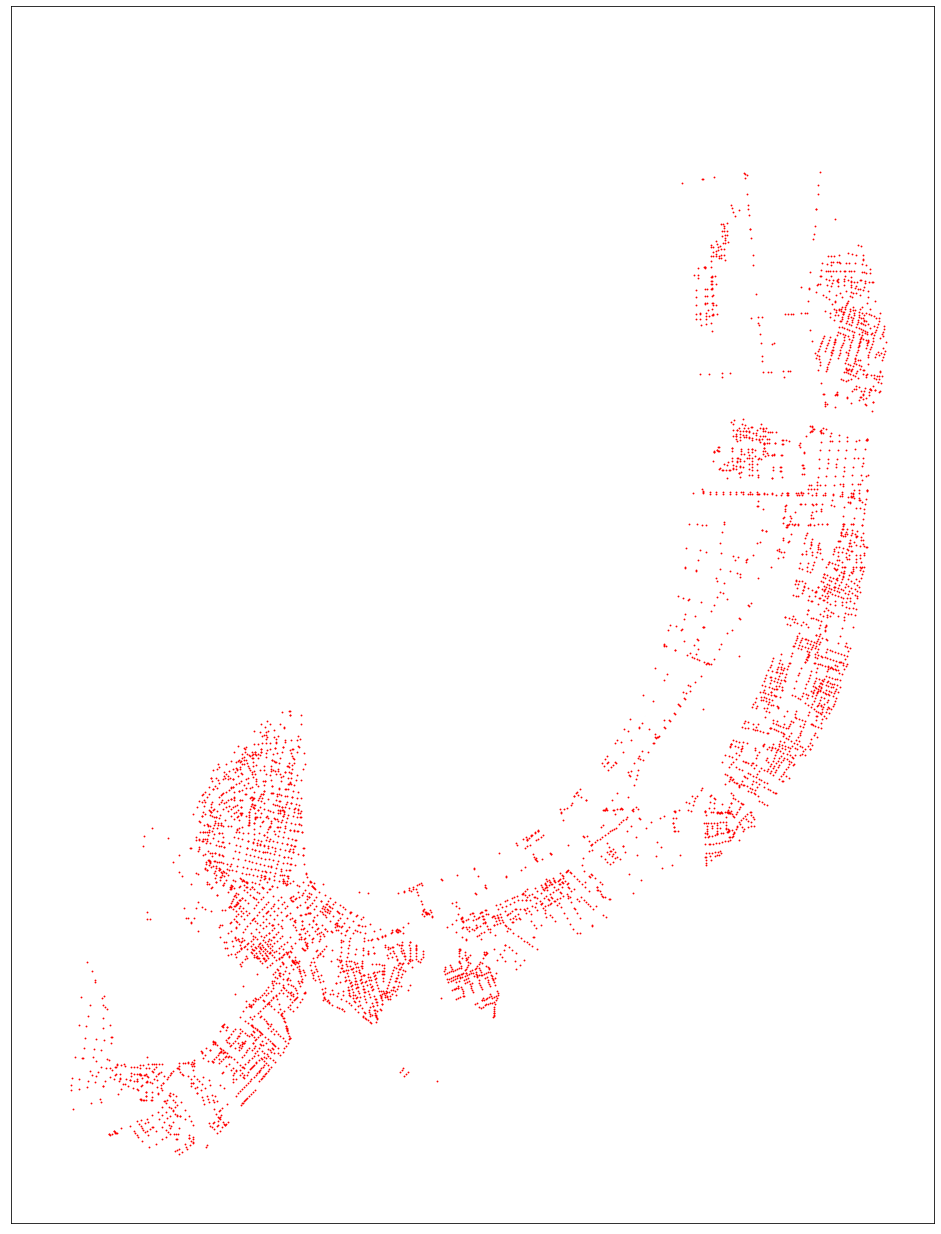

In [65]:
fig, ax = plt.subplots(figsize = figsize)
plt.rcParams['font.size'] = 35
plt.rcParams['font.family'] = 'serif'
cmap = 'Greys'

mapa = rutasTsunami.plot(ax=ax, linewidth=0.000001, alpha=1, legend=False, color='#132795')
rutasgpdTsunami[rutasgpdTsunami['contador']>2].plot(ax=mapa, color='red', markersize=0.7, legend = False)


plt.xticks([], [])
plt.yticks([], [])

plt.tight_layout()
plt.savefig('tesis images/tsunami_network_(b).eps', format='eps')
plt.show()

In [ ]:
# obtenemos la instancia de matplotlib axes para continuar agregandole formas:
BIGGER_SIZE = 50
mapa = rutasTsunami.plot(linewidth=0.6, figsize=figsize, color='black', alpha=0.5) #cmap='coolwarm', column='METROS', legend=False)
# Agregamos los centros poblados a la capa anterior:
rutasgpdTsunami[rutasgpdTsunami['contador']>2].plot(ax = mapa,figsize=figsize, markersize=1, color = 'red')
plt.rc({'monospace.size':20})
#plt.savefig('Inicio-Fin Ruteo Coquimbo.pdf')

In [ ]:
Lmanzent_i = []
Lgeometry = []
for p in range(len(manzentPointsDF)):
    manzent_i = manzentPointsDF['MANZENT_I'].iloc[p]
    shape_area = Manzent[Manzent['MANZENT_I']==manzent_i]['SHAPE_AREA'].iloc[0]
    geometry = manzentPointsDF['geometry'].iloc[p]
    Lmanzent_i.append(manzent_i)
    Lgeometry.append(geometry.buffer(0.001, resolution=16))
manzentBuffer = {'MANZENT_I':Lmanzent_i}
manzentBuffer = pd.DataFrame(manzentBuffer)
manzentBuffer = gpd.GeoDataFrame(manzentBuffer, crs=RiesgoTsunami.crs, geometry=Lgeometry)
manzentBuffer.plot(figsize=(18,18))

In [ ]:
# Obtenemos el CRS de la capa base
gridCRS = Manzent.crs
# Reprojectamos las geometrias de los centros poblados
rutasCoquimbo['geometry'] = rutasCoquimbo['geometry'].to_crs(crs=gridCRS)

# tamaño de la figura:
figsize = (18, 18)

In [ ]:
# obtenemos la instancia de matplotlib axes para continuar agregandole formas:
mapa1 = Manzent.plot(markersize=0.05, column='TOTAL_PERS', cmap='PuOr', legend=False, linewidth=5, figsize=figsize)
mapa2 = manzentPointsDF.plot(ax= mapa1,markersize=0.0000001, color='black')
mapa3 = rutasCoquimbo.plot(ax = mapa2, linewidth=0.01, figsize=figsize, color='black', alpha=0.3)
mapa = manzentBuffer.plot(ax = mapa3, linewidth=0.01, figsize=figsize, color='green')

# Agregamos los centros poblados a la capa anterior:
rutasgpd.plot(ax = mapa,figsize=figsize, markersize = 0.00001, color = 'red')
plt.savefig('PloteoDiagramaCoquimbo.pdf')

In [ ]:
manzentBuffer

In [ ]:
inicio_terminoPath = []
for i in range(len(nodos)):
    inicio_terminoPath.append(Point(nodos[i]))
    
id_inicio_termino = list(nodos.keys()).copy()
inicio_terminoDF = {'id':id_inicio_termino}
inicio_terminoDF = pd.DataFrame(inicio_terminoDF)
inicio_terminoDF = gpd.GeoDataFrame(inicio_terminoDF, crs=RiesgoTsunami.crs, geometry=inicio_terminoPath)
inicio_terminoDF

In [ ]:
container = gpd.sjoin(inicio_terminoDF, manzentBuffer, how='right', op='intersects')
container 

In [ ]:
container.groupby(by=['MANZENT_I'], as_index=False).count().sort_values(by='id',ascending=False)

In [ ]:
sum(container.groupby(by=['MANZENT_I'], as_index=False).count().sort_values(by='id',ascending=False)['id'])

In [ ]:
container = gpd.sjoin(inicio_terminoDF, manzentBuffer, how='inner', op='intersects')
container

In [ ]:
container.groupby(by=['MANZENT_I'], as_index=False).count().sort_values(by='id',ascending=False)

In [ ]:
sum(container.groupby(by=['MANZENT_I'], as_index=False).count().sort_values(by='id',ascending=False)['geometry'])

In [ ]:
len(list(pd.unique(container.groupby(by=['MANZENT_I'], 
                                     as_index=False).count().sort_values(by='id',
                                                                         ascending=False)['MANZENT_I'])))

In [ ]:
Lmanzent_i = list(pd.unique(container.groupby(by=['MANZENT_I'], 
                                              as_index=False).count().sort_values(by='id',
                                                                                  ascending=False)['MANZENT_I']))
len(Lmanzent_i)

In [ ]:
manzentPointsDF

In [ ]:
points_RepresentativeManzents = []
nearest_points_to_paths = []
manzentsid = []
for m in Lmanzent_i:
    minDistance = 999999999999
    lngPoint = list(manzentPointsDF[manzentPointsDF['MANZENT_I']==m]['geometry'].iloc[0].coords)[0][0]
    latPoint = list(manzentPointsDF[manzentPointsDF['MANZENT_I']==m]['geometry'].iloc[0].coords)[0][1]
    representativePoint = (latPoint, lngPoint)
    points = list(container[container['MANZENT_I']==m]['geometry'])
    for p in points:
        lng = list(p.coords)[0][0]
        lat = list(p.coords)[0][1]
        point = (lat, lng)
        if minDistance > round(distance.distance(representativePoint, point).m,2):
            minDistance=round(distance.distance(representativePoint, point).m, 2)
            minPoint = (lat, lng)
    manzentsid.append(m)
    points_RepresentativeManzents.append(representativePoint)
    nearest_points_to_paths.append(minPoint)

print(len(manzentsid), len(points_RepresentativeManzents), len(nearest_points_to_paths))

In [ ]:
nearest_points_to_pathsDF = {'MANZENT_I':manzentsid, 'Representative Point':points_RepresentativeManzents, 'nearest point':nearest_points_to_paths}
nearest_points_to_pathsDF = pd.DataFrame(nearest_points_to_pathsDF)
nearest_points_to_pathsDF

In [ ]:
#Aquellos puntos que no tienen inicio, ni fin de carreteras o caminos, se deben estudiar en mayor profundidad... 
manzents_without_path = []
Lgeometry = []
for m in list(pd.unique(manzentPointsDF['MANZENT_I'])):
    if not m in manzentsid:
        manzents_without_path.append(m)
        Lgeometry.append(manzentPointsDF[manzentPointsDF['MANZENT_I']==m]['geometry'].iloc[0].buffer(0.0039, resolution=16))
len(manzents_without_path)

In [ ]:
manzentsWithoutPathDF = {'MANZENT_I':manzents_without_path}
manzentsWithoutPathDF = pd.DataFrame(manzentsWithoutPathDF)
manzentsWithoutPathDF = gpd.GeoDataFrame(manzentsWithoutPathDF, geometry=Lgeometry, crs=RiesgoTsunami.crs)
manzentsWithoutPathDF

In [ ]:
container = gpd.sjoin(inicio_terminoDF, manzentsWithoutPathDF, how='inner', op='intersects')

In [ ]:
container

In [ ]:
container.groupby(by=['MANZENT_I'], as_index=False).count().sort_values(by='id',ascending=False)

In [ ]:
sum(container.groupby(by=['MANZENT_I'], as_index=False).count().sort_values(by='id',ascending=False)['id'])

In [ ]:
points_RepresentativeManzents = []
nearest_points_to_paths = []
manzentsid = []
for m in manzents_without_path:
    minDistance = 999999999999
    lngPoint = list(manzentPointsDF[manzentPointsDF['MANZENT_I']==m]['geometry'].iloc[0].coords)[0][0]
    latPoint = list(manzentPointsDF[manzentPointsDF['MANZENT_I']==m]['geometry'].iloc[0].coords)[0][1]
    representativePoint = (latPoint, lngPoint)
    points = list(container[container['MANZENT_I']==m]['geometry'])
    for p in points:
        lng = list(p.coords)[0][0]
        lat = list(p.coords)[0][1]
        point = (lat, lng)
        if minDistance > round(distance.distance(representativePoint, point).m,2):
            minDistance=round(distance.distance(representativePoint, point).m, 2)
            minPoint = (lat, lng)
    manzentsid.append(m)
    points_RepresentativeManzents.append(representativePoint)
    nearest_points_to_paths.append(minPoint)

print(len(manzentsid), len(points_RepresentativeManzents), len(nearest_points_to_paths))

In [ ]:
manzentsWithoutPathDF = {'MANZENT_I':manzentsid, 'Representative Point':points_RepresentativeManzents, 'nearest point':nearest_points_to_paths}
manzentsWithoutPathDF = pd.DataFrame(manzentsWithoutPathDF)
manzentsWithoutPathDF

In [ ]:
nearest_points_to_pathsDF = pd.concat([nearest_points_to_pathsDF, manzentsWithoutPathDF], axis=0)
nearest_points_to_pathsDF

In [ ]:
nearest_points_to_pathsDF['Representative Point'] = nearest_points_to_pathsDF['Representative Point'].apply(lambda x:(x[1],x[0]))
nearest_points_to_pathsDF['nearest point'] = nearest_points_to_pathsDF['nearest point'].apply(lambda x:(x[1],x[0]))
nearest_points_to_pathsDF

In [ ]:
from shapely.geometry import LineString

In [ ]:
Lmanzent_i = []
Lrepresentative_point = []
Lnearest_point = []
Lgeometry = []
for m in range(len(nearest_points_to_pathsDF)):
    manzent_i = nearest_points_to_pathsDF['MANZENT_I'].iloc[m]
    representative_point = nearest_points_to_pathsDF['Representative Point'].iloc[m]
    nearest_point = nearest_points_to_pathsDF['nearest point'].iloc[m]
    conexion = LineString([representative_point, nearest_point])
    Lmanzent_i.append(manzent_i)
    Lrepresentative_point.append(representative_point)
    Lnearest_point.append(nearest_point)
    Lgeometry.append(conexion)
nearest_points_to_pathsDF = {'MANZENT_I':Lmanzent_i, 
                             'Representative Point':Lrepresentative_point, 
                             'nearest point':Lnearest_point}
nearest_points_to_pathsDF = pd.DataFrame(nearest_points_to_pathsDF)
nearest_points_to_pathsDF = gpd.GeoDataFrame(nearest_points_to_pathsDF, crs=RiesgoTsunami.crs, geometry=Lgeometry)
nearest_points_to_pathsDF

In [ ]:
nearest_points_to_pathsDF['METROS'] = nearest_points_to_pathsDF['geometry'].apply(distances)
nearest_points_to_pathsDF

In [ ]:
# Obtenemos el CRS de la capa base
gridCRS = Manzent.crs
# Reprojectamos las geometrias de los centros poblados
rutasCoquimbo['geometry'] = rutasCoquimbo['geometry'].to_crs(crs=gridCRS)

# tamaño de la figura:
figsize = (18, 18)

In [ ]:
# obtenemos la instancia de matplotlib axes para continuar agregandole formas:
mapa1 = Manzent.plot(markersize=0.05, column='TOTAL_PERS', cmap='PuOr', legend=False, linewidth=5, figsize=figsize)
mapa2 = manzentPointsDF.plot(ax= mapa1,markersize=0.0000001, color='black')
mapa3 = rutasCoquimbo.plot(ax = mapa2, linewidth=0.01, figsize=figsize, color='black', alpha=0.3)
mapa = rutasgpd.plot(ax = mapa3, figsize=figsize, markersize=0.00001, color='red')

# Agregamos los centros poblados a la capa anterior:
nearest_points_to_pathsDF.plot(ax = mapa, figsize=figsize, linewidth=0.01, color = 'green')
plt.savefig('DiagramaProblemaFull.pdf')

In [ ]:
list(V.values())[-1]

In [ ]:
len(V.values())

In [ ]:
len(nearest_points_to_pathsDF)

In [ ]:
i = len(V.values())
for d in list(nearest_points_to_pathsDF['Representative Point']):
    V[d] = i
    nodos[i] = d
    i+=1

In [ ]:
list(nodos.keys())[-1]

In [ ]:
len(V)

In [ ]:
list(P.keys())[-1]

In [ ]:
len(rutasCoquimbo)

In [ ]:
p = len(rutasCoquimbo)
filtroManzent = {}
for m in range(len(nearest_points_to_pathsDF)):
    puntoManzent = V[nearest_points_to_pathsDF['Representative Point'].iloc[m]]
    puntoPath = V[nearest_points_to_pathsDF['nearest point'].iloc[m]]
    metros = nearest_points_to_pathsDF['METROS'].iloc[m]
    if not (p, puntoManzent, puntoPath) in arcos:
        arcos.append((p, puntoManzent, puntoPath))
    if not (p, puntoPath, puntoManzent) in arcos:
        arcos.append((p, puntoPath, puntoManzent))
    if not (p, puntoManzent, puntoPath) in arcs:
        arcs.append((p,puntoManzent, puntoPath))
    manzent_i = nearest_points_to_pathsDF['MANZENT_I'].iloc[m]
    filtroManzent[manzent_i] = puntoManzent
    F[p] = metros
    p+=1

In [ ]:
len(arcos)

In [ ]:
len(F)

# Diagrama que combina Manzents, Rutas inicio fin, longitud de ruta e inundación de tsunami 

In [ ]:
# Obtenemos el CRS de la capa base
gridCRS = Manzent.crs
# Reprojectamos las geometrias de los centros poblados
rutasCoquimbo['geometry'] = rutasCoquimbo['geometry'].to_crs(crs=gridCRS)

# tamaño de la figura:
figsize = (18, 18)

In [ ]:
# obtenemos la instancia de matplotlib axes para continuar agregandole formas:
mapa1 = Manzent.plot(markersize=0.05, column='TOTAL_PERS', cmap='PuOr', legend=False, linewidth=5, figsize=figsize)
mapa2 = RiesgoTsunami.plot(ax= mapa1,markersize=0.05, column='Name', legend=True, cmap='Reds')
mapa = rutasCoquimbo.plot(ax = mapa2, linewidth=0.01, figsize=figsize, color='black', alpha=0.3)

# Agregamos los centros poblados a la capa anterior:
rutasgpd.plot(ax = mapa,figsize=figsize, markersize = 0.00001, color = 'red')
plt.savefig('Diagrama ruteo con profundidad.pdf')

In [ ]:
paths = []
inicios = []
finales = []
for m in arcos:
    paths.append(m[0])
    inicios.append(m[1])
    finales.append(m[2])
df = {'path':paths, 'inicio':inicios, 'fin':finales}
df = pd.DataFrame(df)
df

In [ ]:
# ruta al geojson del pais
PathTopografia = 'C:/Users/chris/Documents/1 Semestre 2020/Logistica humanitaria/Repositorios/cl_niveles_altura250m_geo/cl_tipo_costa_geo.shp'
Topografia = gpd.read_file(PathTopografia)
#PoblacionCoquimbo = PoblacionCoquimbo[(PoblacionCoquimbo['URBANO']=='LA SERENA')|(PoblacionCoquimbo['URBANO']=='COQUIMBO')]
Topografia.head()

In [ ]:
Topografia.to_crs(RiesgoTsunami.crs, inplace=True)
TopografiaLSCOQ = gpd.sjoin(Topografia, RiesgoTsunami, how='inner', op='intersects')
TopografiaLSCOQ.drop_duplicates(subset=['geometry'], keep='first', inplace=True)

In [ ]:
C = {}
for node in nodos.keys():
    C[node] = Point(nodos[node]).distance(TopografiaLSCOQ['geometry'].iloc[0])*100000

## Ejecución modelo ruteo!

In [ ]:
modelo = Model('LH')

### Variables de decisión

$w_{gh}^p \in \{0,1\}$ = Si se decide trasladarse desde el nodo g hacia h, por el camino p 

In [ ]:
w = modelo.addVars(arcos, name='w', lb=0, ub=1, vtype=GRB.BINARY)

In [ ]:
N = list(V.values()) #Todos los nodos de rutas y se incluye también los nodos asociados a distritos!

### F.O

\begin{align}
Min T_{id} = \sum_{p \in P}\sum_{g \in \{d\} \cup V}\sum_{h \in V \cup \{i\}}w_{gh}^pF^p && \forall i \in I, d \in D && (1)
\end{align}

In [ ]:
#F.O
modelo.setObjective(expr=quicksum(w[(p,g,h)]*round(F[(p)],2) for p,g,h in arcos),sense=GRB.MINIMIZE)

#### Restricción asociada a la continuidad de la ruta
\begin{align}
\sum_{g \in \{d\} \cup V}\sum_{p \in P}w_{gh}^p = \sum_{g \in V \cup \{i\}}\sum_{p\in P}w_{hg}^p && \forall h \in V, |P|>1 && (2)
\end{align}

In [ ]:
modelo.addConstrs(w.sum('*','*',h) == w.sum('*',h, '*') for h in N 
                  if len(pd.unique(df[(df['inicio']==h)|(df['fin']==h)]['path']))>1)

#### Restriccion asociada a no devolverse por la carretera si es que fue seleccionada previamente! 

\begin{align}
w_{gh}^p + w_{hg}^p \leq 1 && \forall (g,h) \in V^2, p \in P && (3)
\end{align}

In [ ]:
modelo.addConstrs(w[(p,g,h)]+w[(p,h,g)]<=1 for p,g,h in arcs)

#### Definición de ida-llegada
\begin{align}
\sum_{p \in P}\sum_{g \in V}w_{gi}^p \geq 1 && && (4) \\ \\
\sum_{p \in P}\sum_{h \in V}w_{dh}^p \geq 1 && && (5)
\end{align}

In [ ]:
#Final = 4101051011014
i = filtroManzent['4101051011014']
modelo.addConstr(w.sum('*','*',i)>=1)
#Inicio = 4102031002039
d = filtroManzent['4102031002039']
modelo.addConstr(w.sum('*',d,'*')>=1)

#### Restriccion que asegura seguir una ruta sin parar antes de llegar al destino! 

\begin{align}
\sum_{p \in P}\sum_{g \in V}w_{gh}^p=0 && \forall h \in V, h \neq i, h \neq d, |P| \leq 1 && (6)
\end{align}

In [ ]:
modelo.addConstrs(w.sum('*', '*', h)==0 for h in N if (h!=i) and (h!=d) and len(pd.unique(df[(df['inicio']==h)|(df['fin']==h)]['path']))<=1)

In [ ]:
modelo.addConstrs((C[h]-C[g])*w[(p,g,h)]>=-100 for p,g,h in arcos if not (g in filtroManzent.values() or 
                                                                          h in filtroManzent.values()))

In [ ]:
modelo.update()

In [ ]:
modelo.optimize()

In [ ]:
arcos_activos = [(p,g,h) for p,g,h in arcos if w[(p,g,h)].X!=0]
arcos_activos

In [ ]:
paths = []
nodosSolution = []
for m in arcos_activos:
    camino = rutasCoquimbo[rutasCoquimbo['id_ruta']==m[0]]['geometry']
    if len(camino)==0:
        if not m[1] in nodosSolution:
            nodosSolution.append(Point(nodos[m[1]]))
        if not m[2] in nodosSolution:
            nodosSolution.append(Point(nodos[m[2]]))
        paths.append(LineString([nodos[m[1]],nodos[m[2]]]))
    else:
        camino = camino.iloc[0]
        paths.append(camino)
        inicio = Point(list(camino.coords)[0])
        fin = Point(list(camino.coords)[-1])
        if not inicio in nodosSolution:
            nodosSolution.append(inicio)
        if not fin in nodosSolution:
            nodosSolution.append(fin)

In [ ]:
rutaSolution = gpd.GeoDataFrame(crs=RiesgoTsunami.crs, geometry=paths)
nodesGDF = gpd.GeoDataFrame(crs=RiesgoTsunami.crs, geometry=nodosSolution)

In [ ]:
# Obtenemos el CRS de la capa base
gridCRS = Manzent.crs
# Reprojectamos las geometrias de los centros poblados
rutasCoquimbo['geometry'] = rutasCoquimbo['geometry'].to_crs(crs=gridCRS)

# tamaño de la figura:
figsize = (18, 18)

In [ ]:
# obtenemos la instancia de matplotlib axes para continuar agregandole formas:
mapa1 = Manzent.plot(markersize=0.05, column='TOTAL_PERS', cmap='PuOr', legend=False, linewidth=5, figsize=figsize)
mapa2 = manzentPointsDF.plot(ax= mapa1,markersize=0.0000001, color='black')
mapa3 = rutaSolution.plot(ax = mapa2, linewidth=5, figsize=figsize, color='red', alpha=1)

# Agregamos los centros poblados a la capa anterior:
nodesGDF.plot(ax = mapa3, figsize=figsize, markersize=0.5, color='black')
plt.savefig('PrimeraSolucion REDES.pdf')